# Exploration

This file contains the basic exploration to learn how to use these kinds of tools / do this

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Exploring the data we got from https://openaipublic.blob.core.windows.net/simple-evals/mmlu.csv

In [2]:
df = pd.read_csv('test.csv')
df.head()

,Unnamed: 0,Question,A,B,C,D,Answer,Subject
0,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract_algebra
1,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract_algebra
2,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract_algebra
3,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract_algebra
4,4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract_algebra


In [6]:
df['Subject'].unique()

array(['abstract_algebra', 'anatomy', 'astronomy', 'business_ethics',
       'clinical_knowledge', 'college_biology', 'college_chemistry',
       'college_computer_science', 'college_mathematics',
       'college_medicine', 'college_physics', 'computer_security',
       'conceptual_physics', 'econometrics', 'electrical_engineering',
       'elementary_mathematics', 'formal_logic', 'global_facts',
       'high_school_biology', 'high_school_chemistry',
       'high_school_computer_science', 'high_school_european_history',
       'high_school_geography', 'high_school_government_and_politics',
       'high_school_macroeconomics', 'high_school_mathematics',
       'high_school_microeconomics', 'high_school_physics',
       'high_school_psychology', 'high_school_statistics',
       'high_school_us_history', 'high_school_world_history',
       'human_aging', 'human_sexuality', 'international_law',
       'jurisprudence', 'logical_fallacies', 'machine_learning',
       'management', 'marketing

Number of questions per subject:
Subject
professional_law                       1534
moral_scenarios                         895
miscellaneous                           783
professional_psychology                 612
high_school_psychology                  545
high_school_macroeconomics              390
elementary_mathematics                  378
moral_disputes                          346
prehistory                              324
philosophy                              311
high_school_biology                     310
nutrition                               306
professional_accounting                 282
professional_medicine                   272
high_school_mathematics                 270
clinical_knowledge                      265
security_studies                        245
high_school_microeconomics              238
high_school_world_history               237
conceptual_physics                      235
marketing                               234
human_aging                        

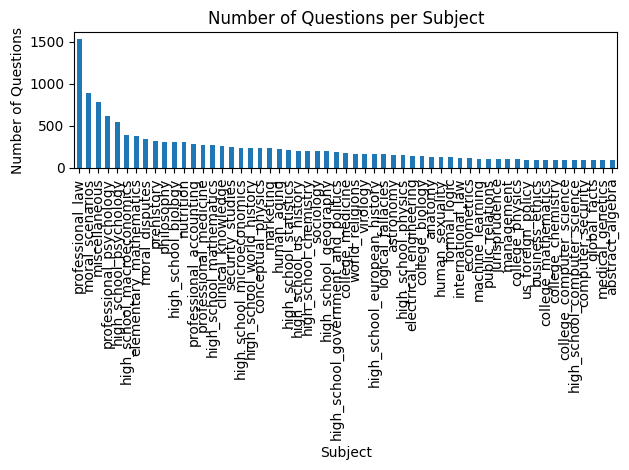

In [4]:
# Count how many questions are in each subject
subject_counts = df['Subject'].value_counts()

# Display the result
print("Number of questions per subject:")
print(subject_counts)

# Optional: Plot it
subject_counts.plot(kind="bar", title="Number of Questions per Subject")
plt.xlabel("Subject")
plt.ylabel("Number of Questions")
plt.tight_layout()
plt.show()


# Exploring First Experiment

Model: gpt-4o-mini
Total questions: 100
Correct answers: 68
Accuracy: 68.00%

Examples of incorrect predictions:


,Question,Answer,Predicted
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",C,None of the options are correct.
3,Statement 1 | A factor group of a non-Abelian ...,B,D
5,Statement 1 | If a group has an element of ord...,A,B
6,Statement 1 | Every homomorphic image of a gro...,A,C
7,Statement 1 | A ring homomorphism is one to on...,D,C


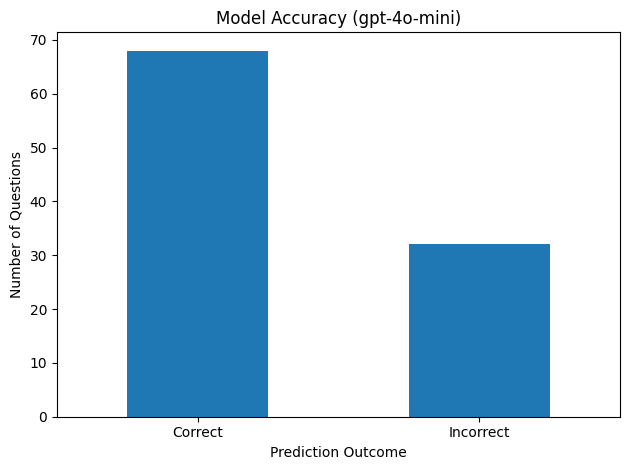

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the model predictions CSV
df = pd.read_csv("answered_gpt-4o-mini.csv")

# Compare predicted answers to the ground truth
df["Correct"] = df["Predicted"].str.upper().str.strip() == df["Answer"].str.upper().str.strip()

# Count total and correct
total_questions = len(df)
num_correct = df["Correct"].sum()
accuracy = num_correct / total_questions * 100

# Print basic stats
print(f"Model: gpt-4o-mini")
print(f"Total questions: {total_questions}")
print(f"Correct answers: {num_correct}")
print(f"Accuracy: {accuracy:.2f}%")

# Optional: print incorrect examples
print("\nExamples of incorrect predictions:")
display(df[~df["Correct"]][["Question", "Answer", "Predicted"]].head(5))

# Plot the number of correct vs incorrect answers
correct_counts = df["Correct"].value_counts().rename({True: "Correct", False: "Incorrect"})

correct_counts.plot(kind="bar", rot=0)
plt.title("Model Accuracy (gpt-4o-mini)")
plt.ylabel("Number of Questions")
plt.xlabel("Prediction Outcome")
plt.tight_layout()
plt.show()


# Ensuring that data.csv is correct

We created data.csv to contain values from the 17 subcategories located in categories.py, and this code proves that we did it correctly

✅ All required columns are present.

⚠️ Missing values found in the following columns:
A    1
D    2
dtype: int64
✅ All answers are valid (A/B/C/D).

📊 Number of examples per subcategory:
Subcategory
biology             100
history             100
politics            100
physics             100
philosophy          100
other               100
math                100
law                 100
health              100
business            100
geography           100
engineering         100
economics           100
culture             100
computer science    100
chemistry           100
psychology          100
Name: count, dtype: int64


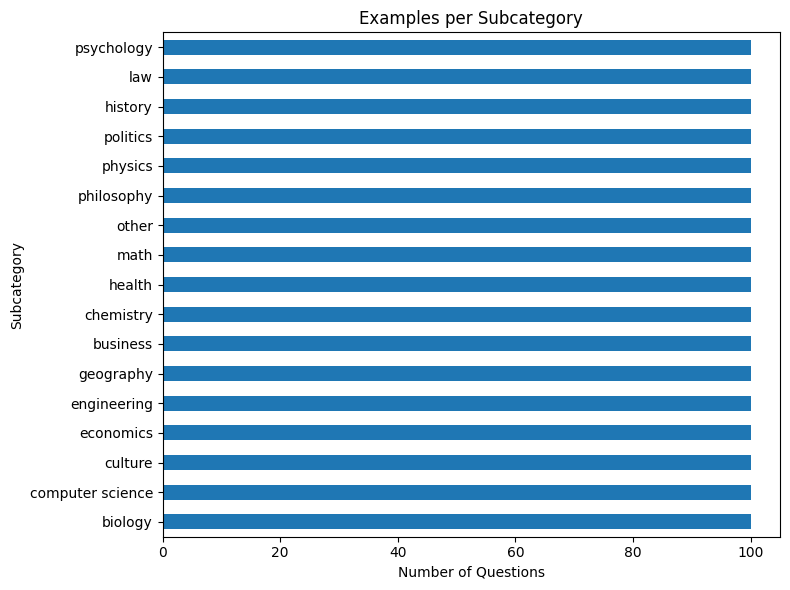

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")

# Required columns
required_columns = {"Question", "A", "B", "C", "D", "Answer", "Subject", "Subcategory"}
missing_cols = required_columns - set(df.columns)

if missing_cols:
    print(f"❌ Missing required columns: {missing_cols}")
else:
    print("✅ All required columns are present.")

# Check for nulls in key columns
nulls = df[["Question", "A", "B", "C", "D", "Answer", "Subject", "Subcategory"]].isnull().sum()
if nulls.sum() > 0:
    print("\n⚠️ Missing values found in the following columns:")
    print(nulls[nulls > 0])
else:
    print("✅ No missing values in required columns.")

# Check that all answers are valid (A/B/C/D)
valid_answers = {"A", "B", "C", "D"}
invalid_answers = df[~df["Answer"].isin(valid_answers)]

if len(invalid_answers) > 0:
    print(f"\n❌ Found {len(invalid_answers)} rows with invalid answers:")
    display(invalid_answers[["Question", "Answer"]].head())
else:
    print("✅ All answers are valid (A/B/C/D).")

# Check subcategory balance
subcategory_counts = df["Subcategory"].value_counts()
print("\n📊 Number of examples per subcategory:")
print(subcategory_counts)

# Optional: Plot subcategory distribution
import matplotlib.pyplot as plt

subcategory_counts.sort_values().plot(kind="barh", figsize=(8, 6), title="Examples per Subcategory")
plt.xlabel("Number of Questions")
plt.tight_layout()
plt.show()
